In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

"""
Data Analysis and Machine Learning Program for recommending Anime cinema.
Includes graphical charts for the data used in regards to average ratings, number of ratings, and types of entertainment. 
- Tommy Billington (Github: tombillo1)
"""

#takes the tables for the anime data as well as the data for the rating
anime_data = pd.read_csv('anime.csv')
anime_data.dropna(inplace=True)

rating_data = pd.read_csv('rating.csv')
rating_data = rating_data[rating_data.rating != -1]

#merges the two tables based on the ID of the anime
main_data = pd.merge(anime_data, rating_data, on = 'anime_id')

#film classification for shows
film_data = main_data[['name', 'type']].copy()

#finds the avg rating of each show
avg_rating = main_data.groupby('name')['rating_y'].mean().sort_values(ascending=False).reset_index()
avg_rating.rename(columns = {'rating_y':'avg_rate'}, inplace = True)

#finds the number of ratings for the anime
num_rating = main_data.groupby('name')['rating_y'].count().sort_values(ascending=True).reset_index()
num_rating.rename(columns = {'rating_y':'num_rate'}, inplace = True)

#merges the num of ratings with the avg ratings
temp_data = pd.merge(avg_rating, num_rating, on = 'name')
anime_ratings_data = pd.merge(temp_data, film_data, on = 'name')

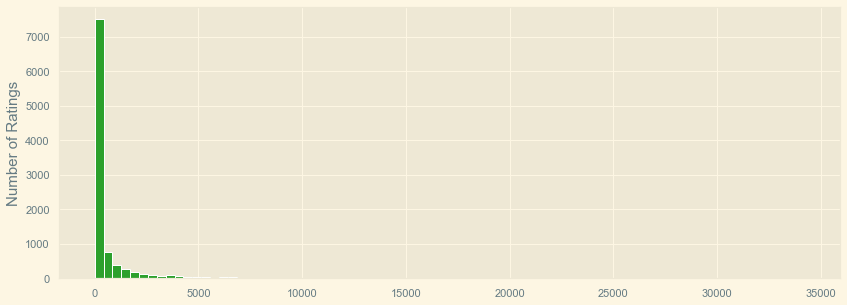

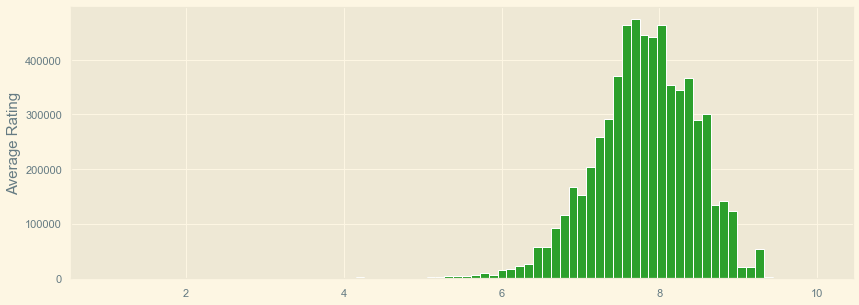

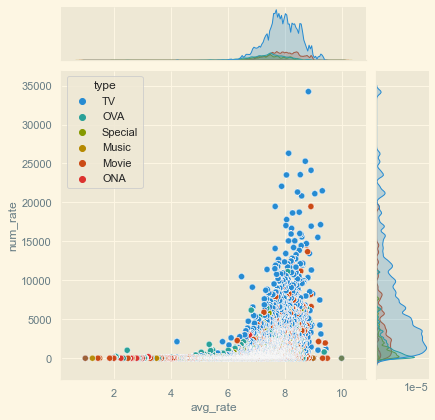

In [110]:
"""
Sets up the graphs for the data:
    * Graph 1: values for number of ratings
    * Graph 2: distribution of the average ratings
    * Graph 3: joint graph with data catagorized per type of show
    
    Note: cell might take a while to load
"""
sns.set(font_scale = 1)
plt.style.use('Solarize_Light2')

plt.figure(figsize=(14,5))
plt.hist(temp_data['num_rate'], bins=80, color='tab:green')
plt.ylabel('Number of Ratings', fontsize=15)
plt.savefig('ratingshist.jpg')

plt.figure(figsize=(14,5))
plt.hist(anime_ratings_data['avg_rate'], bins=80, color='tab:green')
plt.ylabel('Average Rating', fontsize=15)
plt.savefig('avgratinghist.jpg')

merged_plot = sns.jointplot(x = 'avg_rate', y = 'num_rate', data = anime_ratings_data, alpha = 0.5, color='tab:green', hue = 'type')
merged_plot.savefig('mergeplot.jpg')

In [108]:
#finds the type of media at a certain index in main_data
def findType(index_val):
    return main_data.iloc[index_val, 3]
    

In [109]:
"""
KNN algortihm used to recommend a top 10 most relevant media.
"""

#creates and uses threshold for how many reviews a film must have to be recommended
thresh = 75;
all_data = pd.merge(main_data, temp_data, on = 'name')
filtered_data = all_data[all_data['num_rate'] >= thresh]

#creates matrix to use for KNN alg.
featured_data = filtered_data.pivot_table(index ='name', columns = 'user_id', values = 'rating_y').fillna(0)
featured_data_matrix = csr_matrix(featured_data.values)

#model uses brute-force nearestneighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(featured_data_matrix)

ind = np.random.choice(featured_data.shape[0])
X, y = model.kneighbors(featured_data.iloc[ind, :].values.reshape(1, -1), n_neighbors = 11)

for i in range(0, len(X.flatten())):
    if i == 0:
        print(f'Since you watched {featured_data.index[ind]} we recommend ... ')
    else:
        print(f'{i}) {findType(y.flatten()[i])}: {featured_data.index[y.flatten()[i]]}')

Since you watched Inugami-san to Nekoyama-san we recommend ... 
1) Movie: Inugami-san to Nekoyama-san Special
2) TV: Sakura Trick
3) TV: Oneechan ga Kita
4) Movie: Gochuumon wa Usagi Desu ka?
5) TV: Sabagebu!
6) Movie: Futsuu no Joshikousei ga [Locodol] Yattemita.
7) Movie: Hanayamata
8) TV: Mangaka-san to Assistant-san to The Animation
9) Movie: Himegoto
10) TV: Kiniro Mosaic
